# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.


# Загрузка данных

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv('/datasets/gym_churn.csv')

df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [ ]:
df.columns = [i.lower() for i in df]

In [ ]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


# Исследовательский анализ данных (EDA)

In [ ]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [ ]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

In [ ]:
df.groupby('churn').agg('mean').T.style.apply(highlight_min, axis = 1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


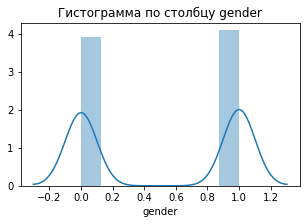

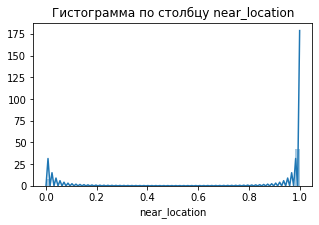

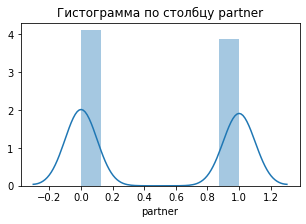

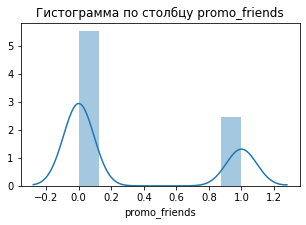

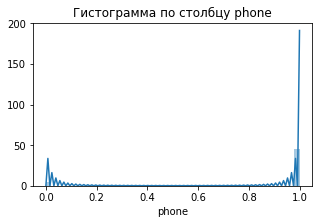

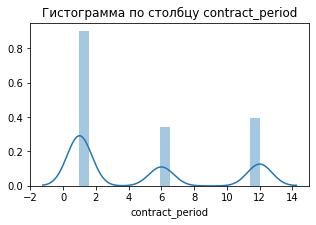

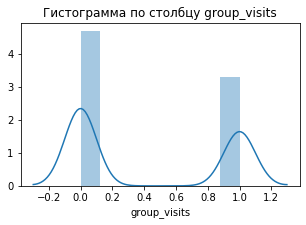

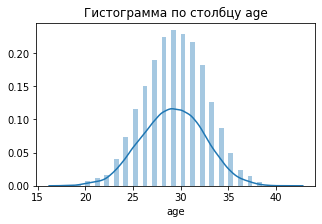

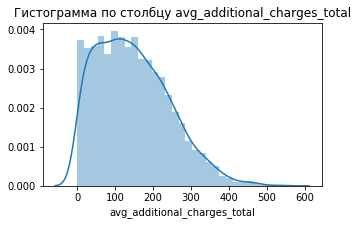

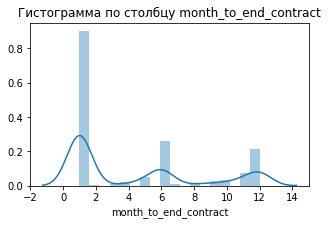

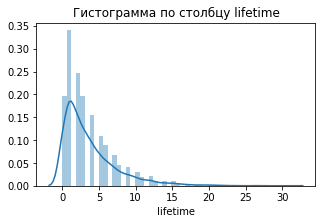

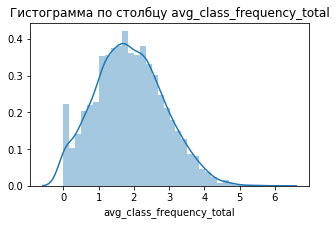

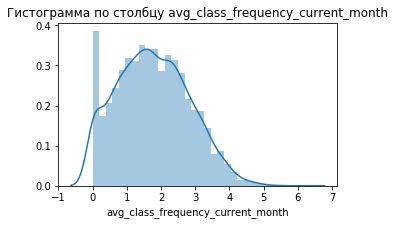

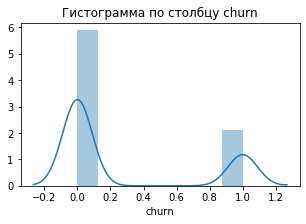

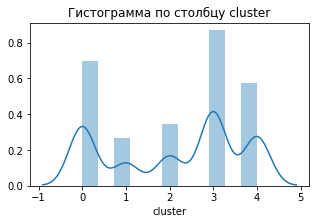

In [ ]:
for column in df.columns:
    df.groupby('churn')[column]
    plt.figure(figsize=(5, 3))
    sns.distplot(df[column])
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

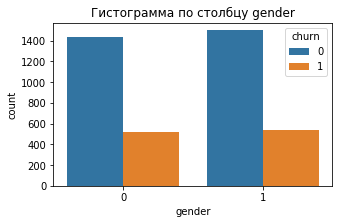

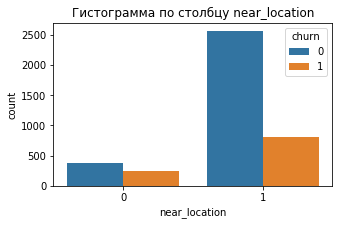

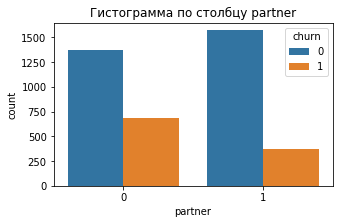

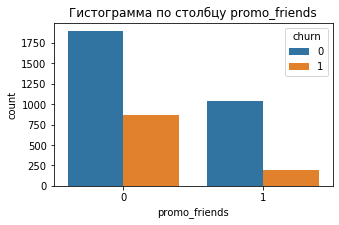

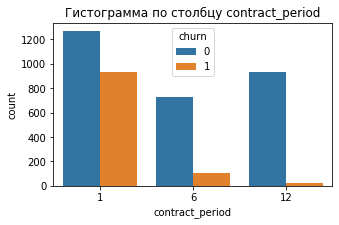

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 3))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

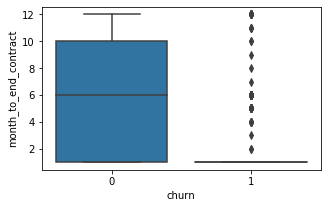

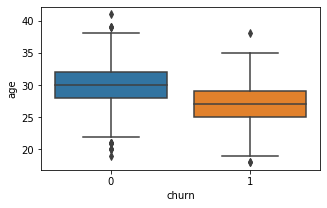

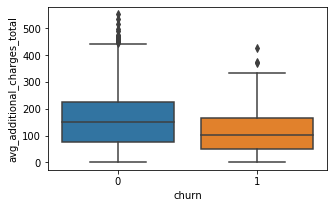

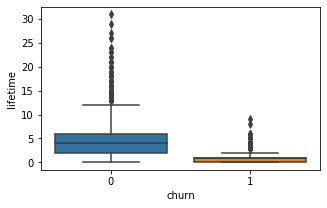

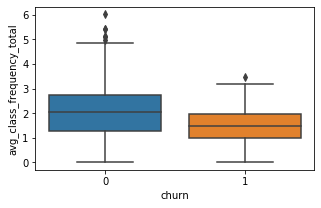

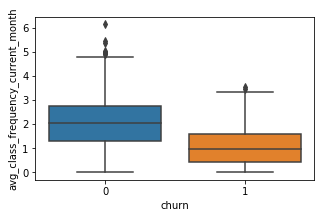

In [ ]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

Вывод: Чаще остаются: сотрудник компании-партнёра клуба; проживание или работа в районе, где находится фитнес-центр; независимо от пола; приведи друга не так популярно.
Чаще уходят: котранкт на 1 месяц (на 12 - редко); без акции "приведи друга", не партнер клуба.

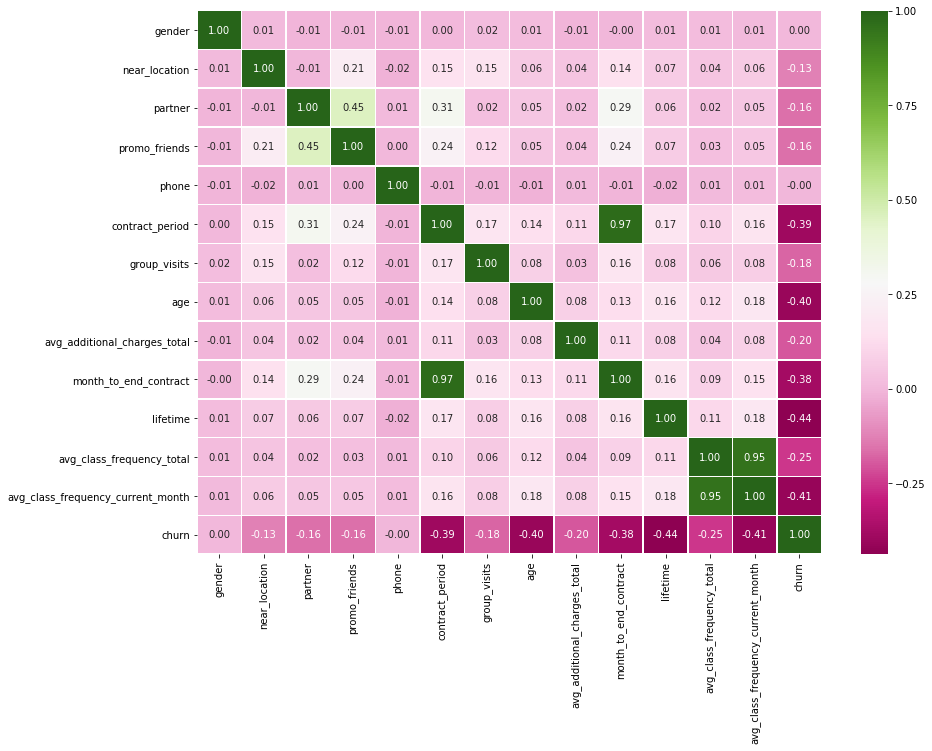

In [ ]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

Есть мультиколлинеарные признаки: contract_period - month_to_end_contract, avg_class_frequency_current_month - avg_class_frequency_total.
Есть признаки с нулевой корреляцией с целевой переменной: phone, gender.

# Модель прогнозирования оттока клиентов

In [ ]:
X = df.drop('churn', axis = 1)
y = df['churn']

## Логистическая регрессия

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Случайный лес 

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


Логистическая регрессия вероятно лучше

<div class = "alert alert-info" >
<h3>Комментарий студента</h3>
    
Они в целом дают довольно одинаковые результаты и довольно неплохие, регрессия - немного лучше. Касательно леса - можно попробовать разные значения глубины дерева или разное количество деревьев (что в принципе может улучшить модель).
    
</div>

# Кластеризация клиентов

In [ ]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [ ]:
linked = linkage(df_sс, method = 'ward')

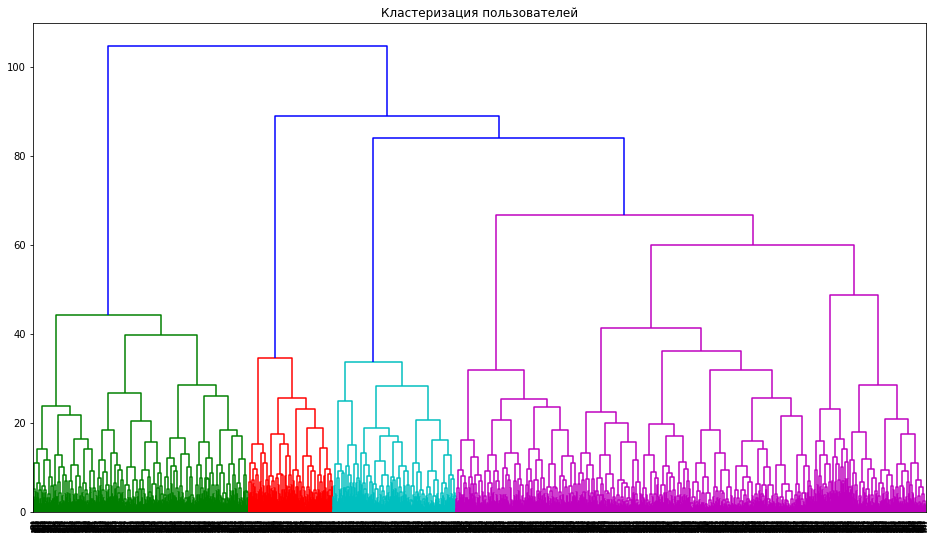

In [ ]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [ ]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [ ]:
df.cluster.value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster, dtype: int64

In [ ]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.88,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.71,143.96,135.46,131.62,161.72
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


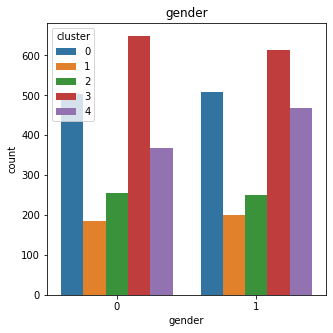

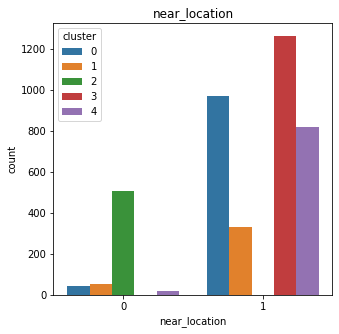

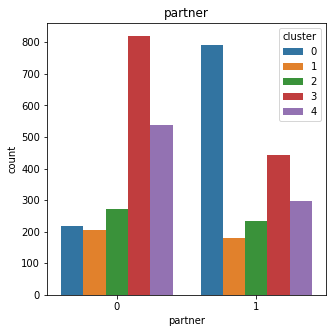

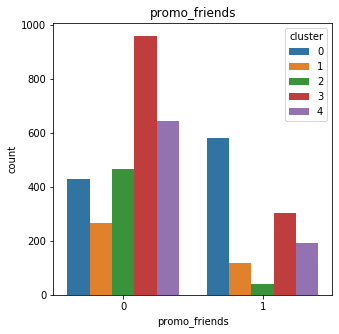

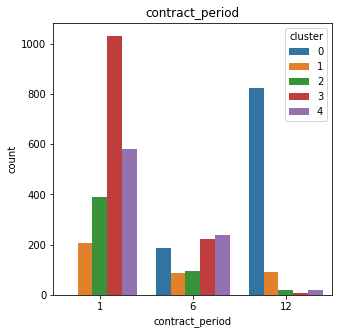

In [ ]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

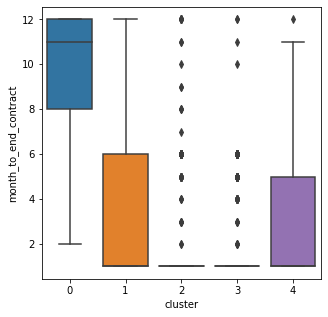

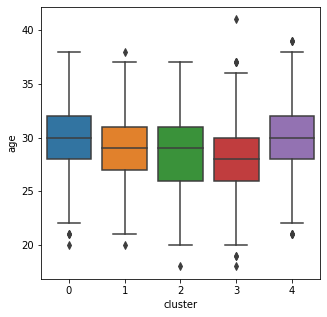

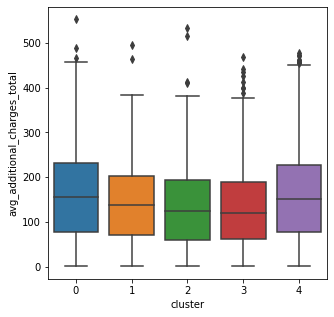

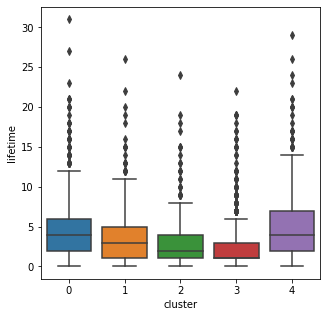

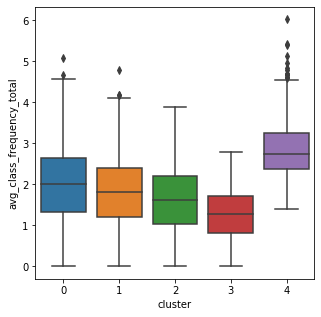

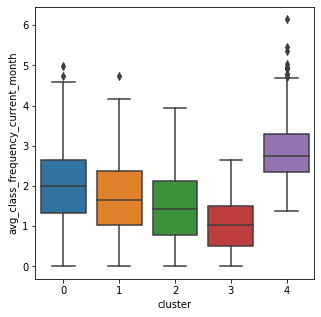

In [ ]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

Вывод:

Кластер 0: за групповые занятия, парнер клуба, по акции "позови друга", маленький отток.

Кластер 1: отсутвует котактынй телефон (что странно), большой срок до окончания контракта.

Кластер 2: не по акции "позови друга", не рядом с клубом.

Кластер 3: находятся рядом с клубом, не любят групповые занятия, практически не партнеры клуба, самые короткие контракты.

Кластер 4: находятся рядом с клубом, маленький отток.

---

Признаки "хороших кластеров" - 0 и 4:

1) довольно большие

2) маленький отток

3) за групповые занятия

4) давно обращаются

5) высокая выручка


# Вывод

Чаще остаются: сотрудник компании-партнёра клуба; проживание или работа в районе, где находится фитнес-центр; независимо от пола; приведи друга не так популярно.

Чаще уходят: котранкт на 1 месяц (на 12 - редко); без акции "приведи друга", не партнер клуба.

---

Кластер 0: за групповые занятия, парнер клуба, по акции "позови друга", маленький отток.

Кластер 1: отсутвует котактынй телефон (что странно), большой срок до окончания контракта.

Кластер 2: не по акции "позови друга", не рядом с клубом.

Кластер 3: находятся рядом с клубом, не любят групповые занятия, практически не партнеры клуба, самые короткие контракты.

Кластер 4: находятся рядом с клубом, маленький отток.

---

Есть мультиколлинеарные признаки: contract_period - month_to_end_contract, avg_class_frequency_current_month - avg_class_frequency_total.

Есть признаки с нулевой корреляцией с целевой переменной: phone, gender.

---

Признаки "хороших кластеров" - 0 и 4:

1) довольно большие

2) маленький отток

3) за групповые занятия

4) давно обращаются

5) высокая выручка

Поддерживать и мотивировать "хорошие кластеры".

Глубже сегментировать оттекающих, к каждому сегменту тестировать индивидуальные предложения.

Чаще становятся постоянными клиентами люди, имеющие абонементы на 6 месяцев и более. Если разместить рекламу акции на длительный абонемент в ближайщих продуктовых магазинах, то это может помочь привлечь людей, живущих неподалеку от клуба.

Люди, посещающие групповые тренировки чаще становятся постоянными клиентами, можно предположить, что разнообразие групповых тренировок может привлечь больше клиентов. Можно провести опрос среди клиентов клуба какие тренировки и в какое удобное время они хотели бы посещать и, возможно, ввести новые направления групповых тренировок.

Заключать больше соглашений с близлежащими организациями на скидки для их сотрудников. Клиентам будет удобнее посещать клуб из-за близости к месту работы и они будут рекомендовать клуб и занятия фитнесом своим коллегам